In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
from tensorflow.keras.regularizers import l2

In [2]:
train_datagen= ImageDataGenerator(rescale= 1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

In [3]:
train_generator= train_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/train',
    target_size= (48,48),
    batch_size= 16,
    color_mode='grayscale'
    ,class_mode= 'categorical'
)
val_generator= val_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/test'
    ,target_size =(48,48)
    ,batch_size= 16,
    color_mode= 'grayscale'
    ,class_mode='categorical'
)

Found 42720 images belonging to 7 classes.
Found 10246 images belonging to 7 classes.


In [4]:
from collections import Counter

class_counts = Counter(train_generator.classes)


class_labels = train_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Training Data Class Count:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

print('\n')
class_counts = Counter(val_generator.classes)


class_labels = val_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Validation Data Class Counts:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

Training Data Class Count:

angry: 4700 images
disgusted: 2893 images
fearful: 4378 images
happy: 11987 images
neutral: 7489 images
sad: 6812 images
surprised: 4461 images


Validation Data Class Counts:

angry: 1120 images
disgusted: 271 images
fearful: 1098 images
happy: 2959 images
neutral: 1913 images
sad: 1725 images
surprised: 1160 images


In [26]:
model = Sequential()
model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))




model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation= 'softmax'))

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 19, 19, 256)      

In [28]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [29]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =10, 
    shuffle = True,

    
)

Epoch 1/10
2670/2670 [==============================] - 45s 17ms/step - loss: 1.8685 - accuracy: 0.3768 - val_loss: 1.4233 - val_accuracy: 0.4881
Epoch 2/10
2670/2670 [==============================] - 45s 17ms/step - loss: 1.3140 - accuracy: 0.5343 - val_loss: 1.2502 - val_accuracy: 0.5584
Epoch 3/10
2670/2670 [==============================] - 48s 18ms/step - loss: 1.1993 - accuracy: 0.5783 - val_loss: 1.1869 - val_accuracy: 0.5875
Epoch 4/10
2670/2670 [==============================] - 47s 18ms/step - loss: 1.1390 - accuracy: 0.6078 - val_loss: 1.1375 - val_accuracy: 0.6065
Epoch 5/10
2670/2670 [==============================] - 47s 18ms/step - loss: 1.0925 - accuracy: 0.6280 - val_loss: 1.1327 - val_accuracy: 0.6172
Epoch 6/10
2670/2670 [==============================] - 48s 18ms/step - loss: 1.0542 - accuracy: 0.6470 - val_loss: 1.1063 - val_accuracy: 0.6297
Epoch 7/10
2670/2670 [==============================] - 50s 19ms/step - loss: 1.0227 - accuracy: 0.6643 - val_loss: 1.0972 -

In [15]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

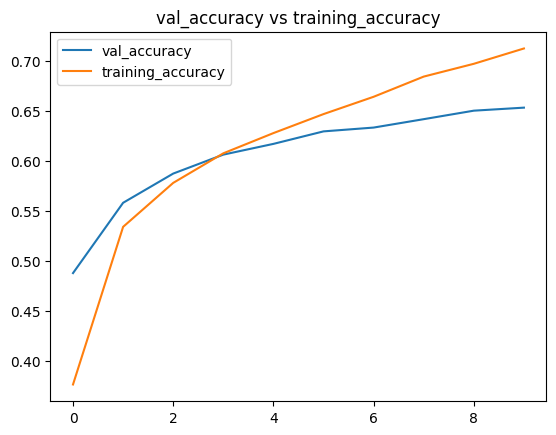

In [30]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

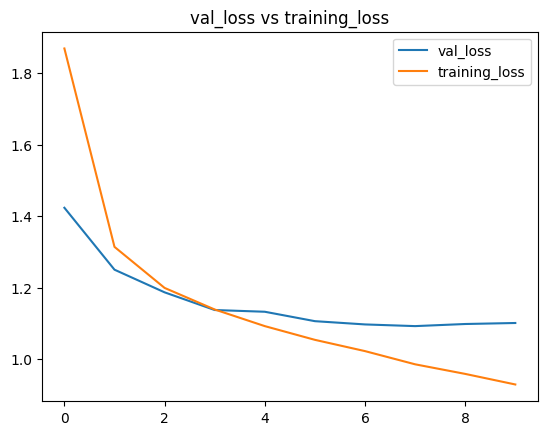

In [31]:
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')

In [25]:
model.save('twisted_model_with_multiple_dataset.h5')

####  Experiment 3: adding BatchNormalization 


In [32]:
model = Sequential()
model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))




model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation= 'softmax'))

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 128)      

In [34]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [35]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =10, 
    shuffle = True,

    
)

Epoch 1/10
2670/2670 [==============================] - 45s 17ms/step - loss: 3.2139 - accuracy: 0.3775 - val_loss: 2.7187 - val_accuracy: 0.4663
Epoch 2/10
2670/2670 [==============================] - 46s 17ms/step - loss: 2.3758 - accuracy: 0.4901 - val_loss: 2.0251 - val_accuracy: 0.5264
Epoch 3/10
2670/2670 [==============================] - 49s 18ms/step - loss: 1.7624 - accuracy: 0.5474 - val_loss: 1.5546 - val_accuracy: 0.5760
Epoch 4/10
2670/2670 [==============================] - 49s 18ms/step - loss: 1.4607 - accuracy: 0.5906 - val_loss: 1.3929 - val_accuracy: 0.5968
Epoch 5/10
2670/2670 [==============================] - 49s 18ms/step - loss: 1.3102 - accuracy: 0.6248 - val_loss: 1.2772 - val_accuracy: 0.6321
Epoch 6/10
2670/2670 [==============================] - 50s 19ms/step - loss: 1.2063 - accuracy: 0.6551 - val_loss: 1.2538 - val_accuracy: 0.6368
Epoch 7/10
2670/2670 [==============================] - 51s 19ms/step - loss: 1.1273 - accuracy: 0.6869 - val_loss: 1.2251 -

Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

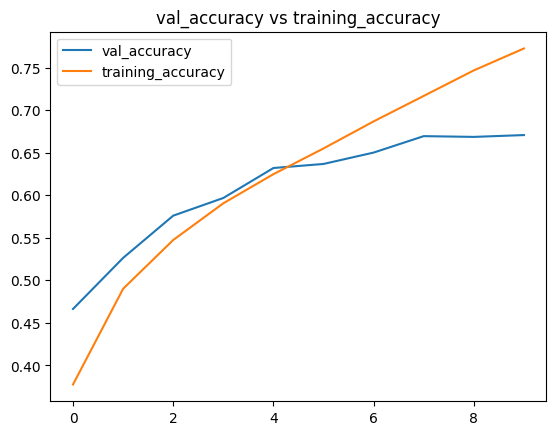

In [36]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

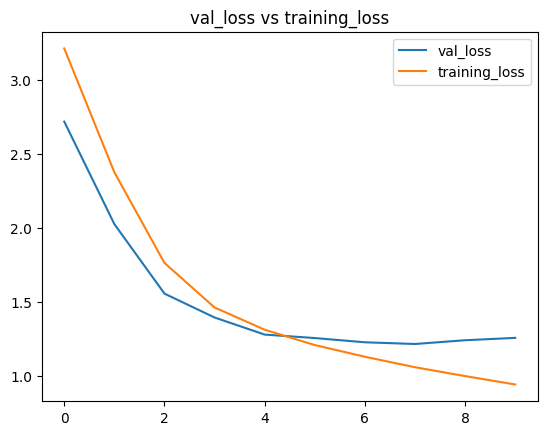

In [37]:
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')

In [38]:
model.save('experiment3.h5')

#### Experiment4: Adding more ConvLayers to improve the performance


In [79]:
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))




model.add(Conv2D(512,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation= 'softmax'))

In [80]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_46 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 21, 21, 128)     

In [81]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [82]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =15, 
    shuffle = True,

    
)

Epoch 1/15
2670/2670 [==============================] - 51s 19ms/step - loss: 3.5926 - accuracy: 0.2697 - val_loss: 3.0484 - val_accuracy: 0.3800
Epoch 2/15
2670/2670 [==============================] - 54s 20ms/step - loss: 2.7049 - accuracy: 0.4166 - val_loss: 2.4331 - val_accuracy: 0.4069
Epoch 3/15
2670/2670 [==============================] - 55s 21ms/step - loss: 1.9405 - accuracy: 0.4955 - val_loss: 1.6013 - val_accuracy: 0.5508
Epoch 4/15
2670/2670 [==============================] - 56s 21ms/step - loss: 1.4849 - accuracy: 0.5466 - val_loss: 1.3386 - val_accuracy: 0.5798
Epoch 5/15
2670/2670 [==============================] - 56s 21ms/step - loss: 1.2988 - accuracy: 0.5824 - val_loss: 1.2240 - val_accuracy: 0.6139
Epoch 6/15
2670/2670 [==============================] - 56s 21ms/step - loss: 1.2036 - accuracy: 0.6096 - val_loss: 1.1978 - val_accuracy: 0.6057
Epoch 7/15
2670/2670 [==============================] - 56s 21ms/step - loss: 1.1364 - accuracy: 0.6340 - val_loss: 1.1444 -

In [83]:
model.save('experiment4.h5')

Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

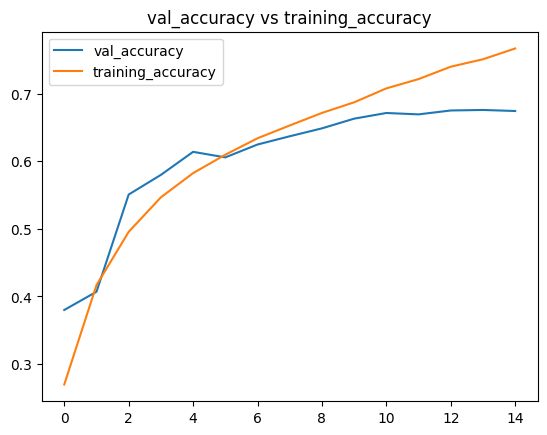

In [84]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

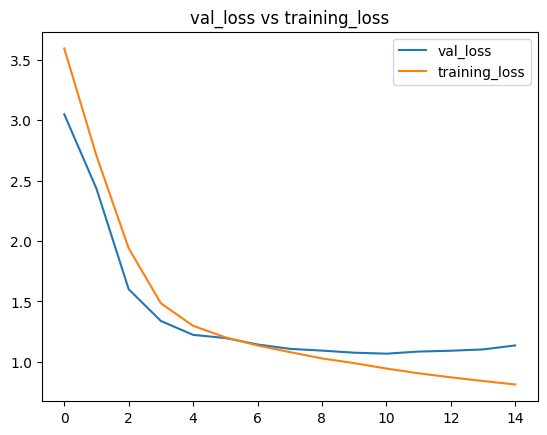

In [85]:
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')

### Experiment 5: 


In [6]:
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))




model.add(Conv2D(512,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation= 'softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 128)      

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =15, 
    shuffle = True,

    
)

Epoch 1/15
2670/2670 [==============================] - 450s 165ms/step - loss: 3.5768 - accuracy: 0.3143 - val_loss: 2.8868 - val_accuracy: 0.4252
Epoch 2/15
2670/2670 [==============================] - 83s 31ms/step - loss: 2.3964 - accuracy: 0.4349 - val_loss: 1.9318 - val_accuracy: 0.4885
Epoch 3/15
2670/2670 [==============================] - 86s 32ms/step - loss: 1.6667 - accuracy: 0.4979 - val_loss: 1.5101 - val_accuracy: 0.5279
Epoch 4/15
2670/2670 [==============================] - 89s 33ms/step - loss: 1.4637 - accuracy: 0.5367 - val_loss: 1.3984 - val_accuracy: 0.5720
Epoch 5/15
2670/2670 [==============================] - 89s 33ms/step - loss: 1.3939 - accuracy: 0.5764 - val_loss: 1.3590 - val_accuracy: 0.5995
Epoch 6/15
2670/2670 [==============================] - 90s 34ms/step - loss: 1.3406 - accuracy: 0.6020 - val_loss: 1.3489 - val_accuracy: 0.6140
Epoch 7/15
2670/2670 [==============================] - 90s 34ms/step - loss: 1.3471 - accuracy: 0.6227 - val_loss: 1.3463

Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

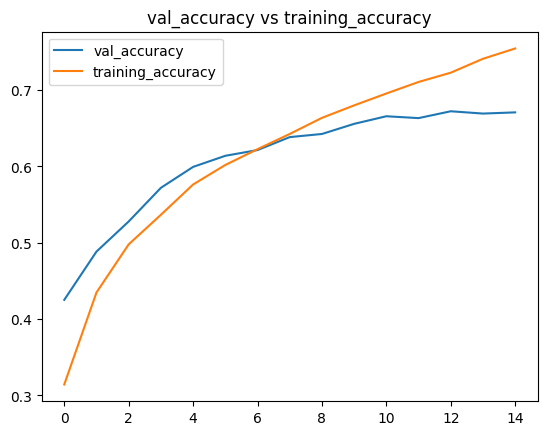

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

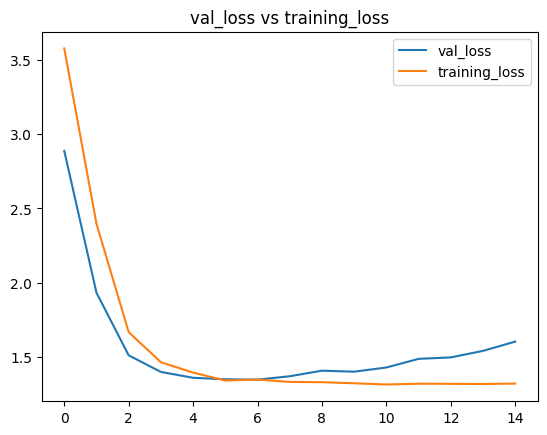

In [12]:
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')

In [13]:
model.save('experiment6.h5')

### Experiment 6

In [14]:
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides= 2))
model.add(Dropout(0.4))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1,padding='same'))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))




model.add(Conv2D(512,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(7, activation= 'softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 128)      

In [16]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =15, 
    shuffle = True,

    
)

Epoch 1/15
2670/2670 [==============================] - 45s 16ms/step - loss: 3.4835 - accuracy: 0.2355 - val_loss: 3.3685 - val_accuracy: 0.3017
Epoch 2/15
2670/2670 [==============================] - 45s 17ms/step - loss: 2.8934 - accuracy: 0.2818 - val_loss: 2.7396 - val_accuracy: 0.3578
Epoch 3/15
2670/2670 [==============================] - 47s 18ms/step - loss: 2.3026 - accuracy: 0.3898 - val_loss: 2.0025 - val_accuracy: 0.4288
Epoch 4/15
2670/2670 [==============================] - 48s 18ms/step - loss: 1.7973 - accuracy: 0.4640 - val_loss: 1.6631 - val_accuracy: 0.4849
Epoch 5/15
2670/2670 [==============================] - 48s 18ms/step - loss: 1.5273 - accuracy: 0.5177 - val_loss: 1.3824 - val_accuracy: 0.5607
Epoch 6/15
2670/2670 [==============================] - 49s 18ms/step - loss: 1.3814 - accuracy: 0.5498 - val_loss: 1.3258 - val_accuracy: 0.5705
Epoch 7/15
2670/2670 [==============================] - 50s 19ms/step - loss: 1.2912 - accuracy: 0.5784 - val_loss: 1.2318 -

Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

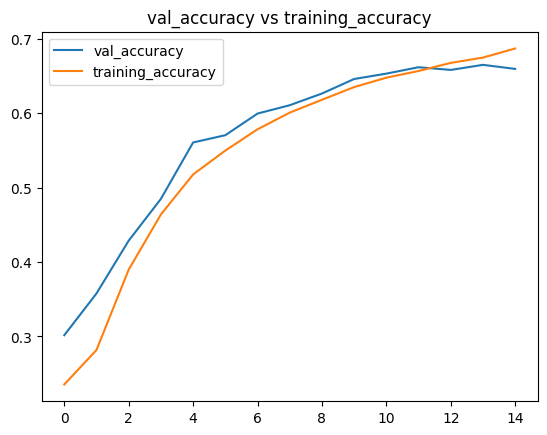

In [18]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

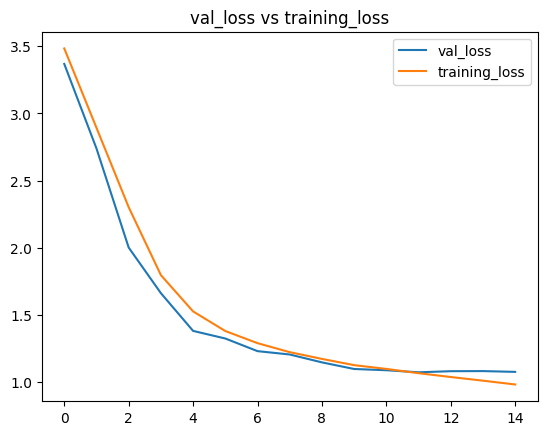

In [19]:
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')

In [20]:
model.save('experiment6.h5')

# Experiment 7 : increasing the epochs 

In [24]:
model = Sequential()


model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2),strides= 2))
model.add(Dropout(0.4))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1,padding='same'))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=1,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))




model.add(Conv2D(512,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(7, activation= 'softmax'))

In [25]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [26]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =30, 
    shuffle = True,

    
)

Epoch 1/30
2670/2670 [==============================] - 48s 18ms/step - loss: 3.4508 - accuracy: 0.2368 - val_loss: 3.3659 - val_accuracy: 0.2984
Epoch 2/30
2670/2670 [==============================] - 47s 18ms/step - loss: 2.8562 - accuracy: 0.2929 - val_loss: 2.5018 - val_accuracy: 0.3967
Epoch 3/30
2670/2670 [==============================] - 109s 41ms/step - loss: 2.2517 - accuracy: 0.4073 - val_loss: 2.2206 - val_accuracy: 0.4382
Epoch 4/30
2670/2670 [==============================] - 349s 131ms/step - loss: 1.7901 - accuracy: 0.4734 - val_loss: 1.6526 - val_accuracy: 0.5180
Epoch 5/30
2670/2670 [==============================] - 46s 17ms/step - loss: 1.5332 - accuracy: 0.5247 - val_loss: 1.4023 - val_accuracy: 0.5604
Epoch 6/30
2670/2670 [==============================] - 48s 18ms/step - loss: 1.3826 - accuracy: 0.5604 - val_loss: 1.3251 - val_accuracy: 0.5837
Epoch 7/30
2670/2670 [==============================] - 49s 18ms/step - loss: 1.2954 - accuracy: 0.5875 - val_loss: 1.289

Text(0.5, 1.0, 'val_accuracy vs training_accuracy')

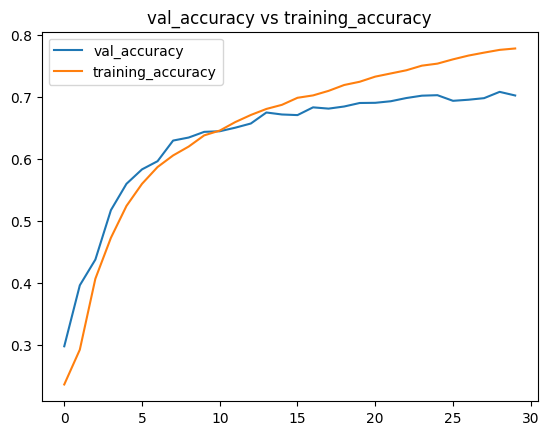

In [27]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('val_accuracy vs training_accuracy')

Text(0.5, 1.0, 'val_loss vs training_loss')

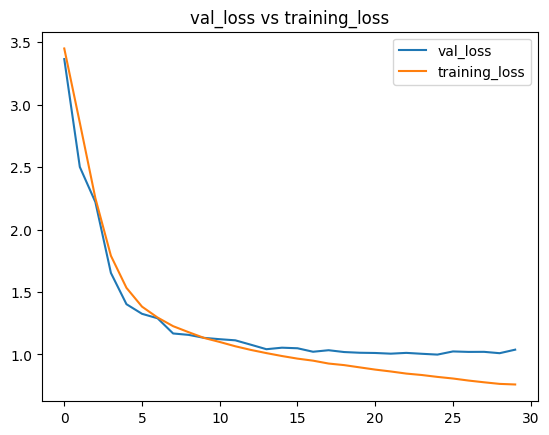

In [29]:
model.save('experiment7.h5')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('val_loss vs training_loss')


In [30]:
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Validation accuracy: {val_acc:.4f}")

641/641 [==============================] - 6s 9ms/step - loss: 1.0380 - accuracy: 0.7029
Validation accuracy: 0.7029
